# Setmore Data Analysis

## Import Needed Libraries Here

In [ ]:
import pandas as pd, numpy as np, plotly.express as px, openpyxl, os, re
from ipywidgets import *
from IPython import *

## Dowloading the Data from Setmore


### Accessing the Data

Please visit [this link](https://my.setmore.com/settings/#accounts/export_schedule) to download the data from Setmore.

If prompted, enter the following credentials:

**Username:** `bffs@berkeley.edu`

**Password:** `Gobears!`

###Selecting the Date Ranges

You should now see a page that looks something like this:
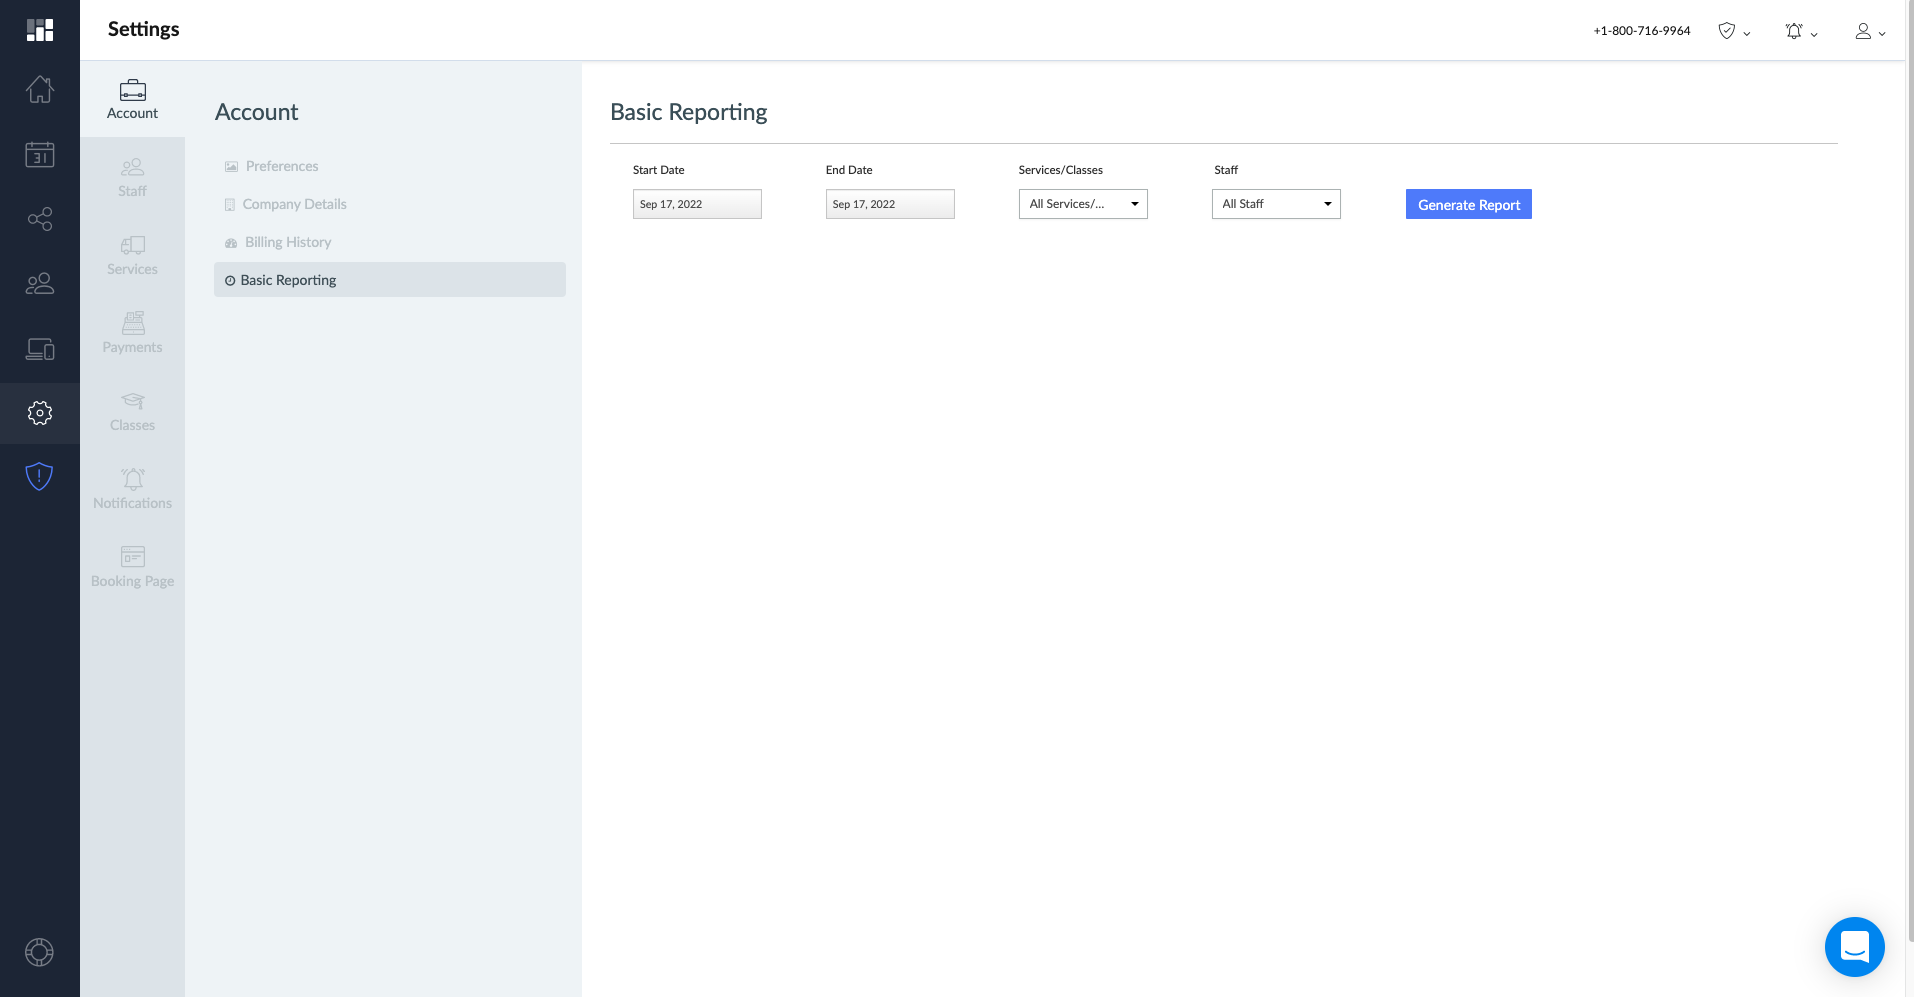

In the `Start Date` Box please select the first date from which you would like to view appointment statistics, and in the `End Date` box, please enter the last date you would like to view appointment statistics for. 

> _Please do not change the `Services/Classes` box or the `Staff` boxes, unless you would only like to look at certain appointment types or certain Peer Educators, respectively._

Once you are satisfied with your selection, clickk the blue `Generate Report` button. Once you have done so, the page should look something like this:

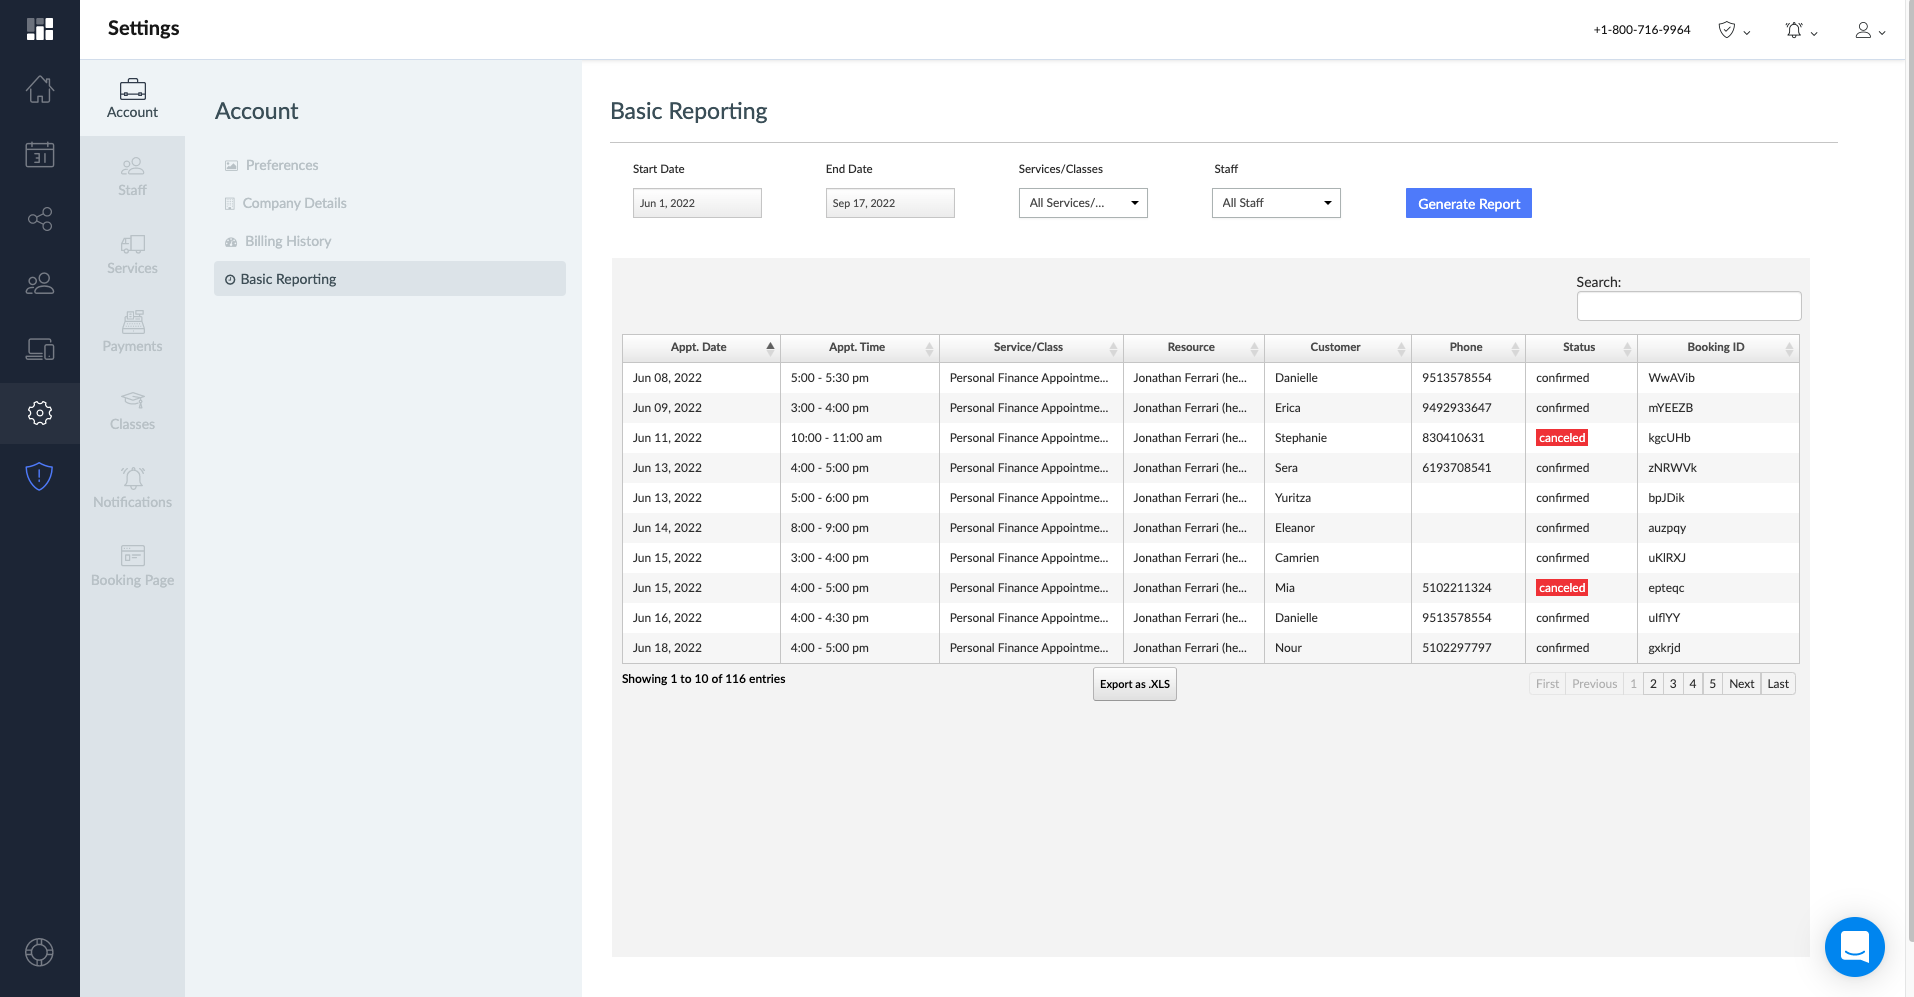

Finally, click the `Export as .XLS` This will download a file on your computer called `appointments.xlsx`.

Please rename the file to `[Start Date]-[End Data]-appointments.xslx`. For example if the _start date_ of the data was `07/12/22` and the _end date_ was `09/07/22`, you would name the file `07/12/22-09/07/22-appointments.xslx` 

## Uploading the Data to the BFFS Drive
Here, please upload the `.xlsx` file to [this folder in the BFFS Drive](https://drive.google.com/drive/folders/1h2G28fPZ1i_2-vudBuawbF4ofScOMaGd?usp=sharing). 

## Sharing the Link

Now, we will need to change the access permissions to this file. Please follow the steps below:
- Right click on the file you just uploaded
- Click the `Share` option
- Under `General Access` clik the dropdown and select `Anyone with the Link`
  - Ensure the dropdown on the right is set to `Viewer`
- Finally, click the `Copy Link` button on the bottom left corner of the popup

> **For confidentiality, please do not share this link with anyone outside of BFFS.**

## Set the Link 
Please run the cell below and then paste your link into the text box that appears.

In [ ]:
link_widget = Text(placeholder='Your Link Here', description='Data Link:')
link_widget

Text(value='', description='Data Link:', placeholder='Your Link Here')

The code below reads in the data from the provided link and cleans it up a little bit so that we can make visualizations look a little bit nicer.

> ***PLEASE DO NOT WORRY ABOUT UNDERSTANDING THE CODE, JUST RUN THE CELL***

If you are getting an error when you run the cell below ***PLEASE CHECK THAT THE LINK DOES NOT REQUIRE ANY SPECIAL ACCESS***

In [ ]:
def fix_type(appt):
  types = ["Personal Finance Appointment (1 hour)", 
           "Personal Finance Appointment (30 minutes)"]
  if appt in types:
    return appt
  else:
    return np.random.choice(types)
appointments_link = re.sub(pattern = r"edit(.)+", repl = "export", 
                           string = link_widget.value)
appointments = pd.read_excel(appointments_link, "People", engine = "openpyxl")[
    ["Date", "Time", "Service/Class", "Resource Name", "Topic", "Topic Details"]
    ]
month_names = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
months = {num : month for num, month in zip(list(range(1, 13)), month_names)}
appointments["Service/Class"] = appointments["Service/Class"].apply(fix_type)
appointments = appointments.rename(columns = {"Service/Class" : "Type",
                                              "Resource Name" : "Peer"})
appointments["Date"] = pd.to_datetime(appointments["Date"])
appointments["Month"] = pd.Series([months[i.month] for i in appointments["Date"]])

In [ ]:
@interact(x = Dropdown(options = ["Time", "Type", 
                                  "Peer", "Month"], 
                       value = "Month"),
          graph = Dropdown(options = ["Bar", "Pie"], value = "Bar"))
def visualize(x, graph):
    title = f"{graph} Chart of {x} of Appointments"
    if graph == "Bar":
        g = px.histogram(appointments, x, 
                         template = "seaborn", color = x, title = title)
        g = g.update_xaxes(categoryorder = "total descending")
    else:
        g = px.pie(appointments, x, template = "seaborn", title = title)
    g.update_layout(width = 1600, height = 800).show()

interactive(children=(Dropdown(description='x', index=3, options=('Time', 'Type', 'Peer', 'Month'), value='Mon…